In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "darkgrid")

In [3]:
data = pd.read_csv("Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Recorrer dataset

In [4]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

# Analizar columnas numericas

In [8]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


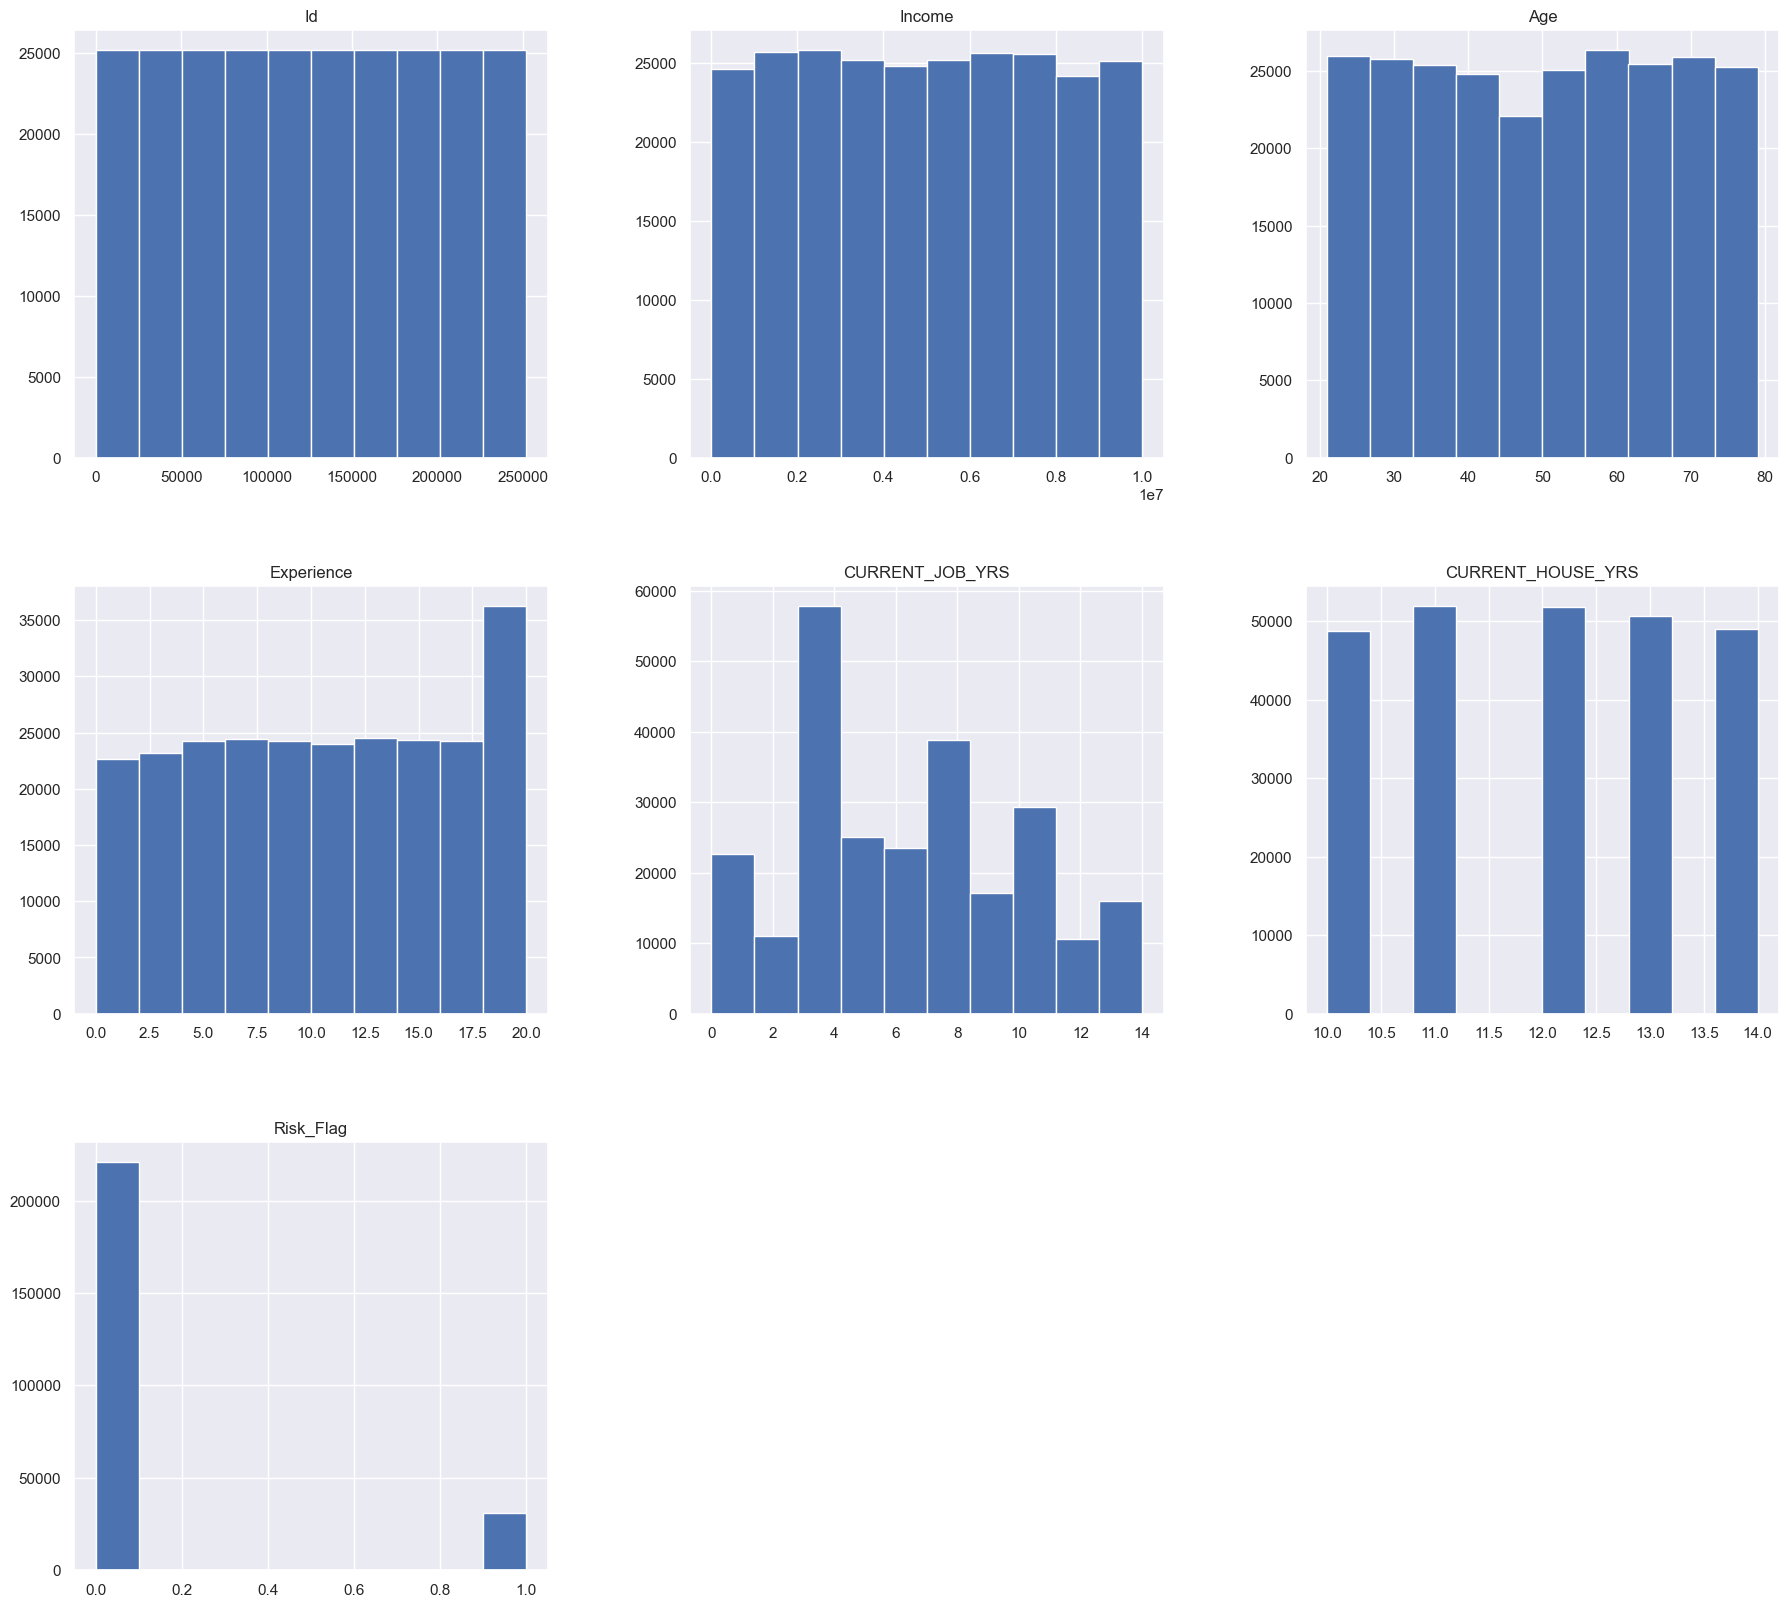

In [9]:
data.hist( figsize = (22, 20) )
plt.show()

In [10]:
data["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

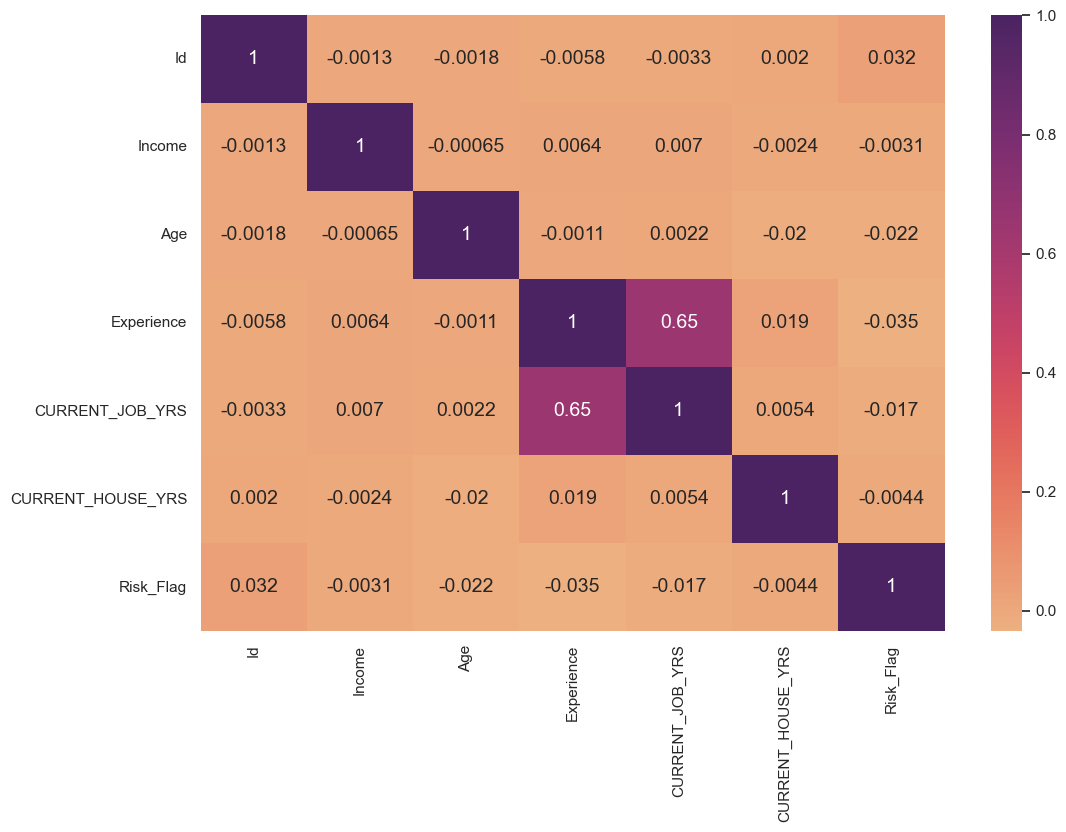

In [11]:
fig, ax = plt.subplots( figsize = (12,8) )

numerical_features = data.select_dtypes(include=[np.number])
corr_matrix = numerical_features.corr()

corr_heatmap = sns.heatmap(corr_matrix, cmap="flare", annot=True, ax=ax, annot_kws={"size": 14})

plt.show()

# Analizar columnas categoricas

In [12]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

Married/Single
single     226272
married     25728
Name: count, dtype: int64


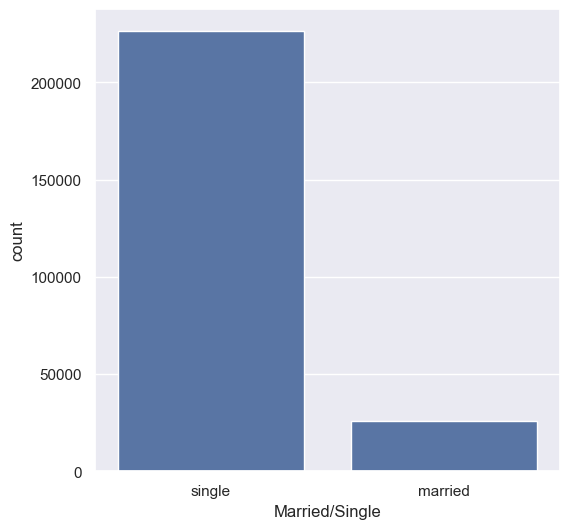

In [13]:
categorical_valcount_hist("Married/Single")

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64


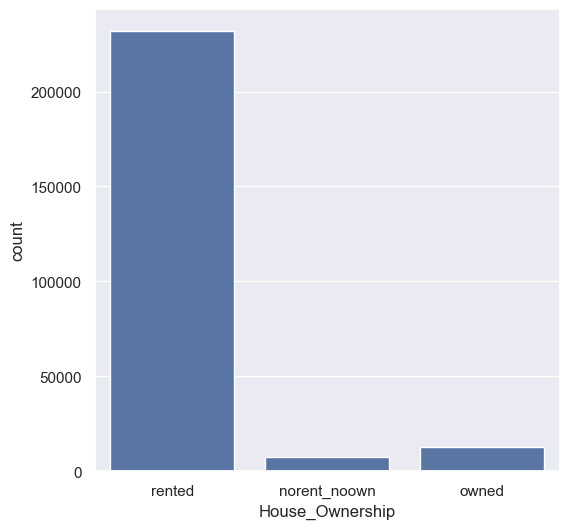

In [14]:
categorical_valcount_hist("House_Ownership")

In [15]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

STATE
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: count, dtype: int64


In [16]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

# Data Analysis

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


<Axes: xlabel='Risk_Flag', ylabel='Income'>

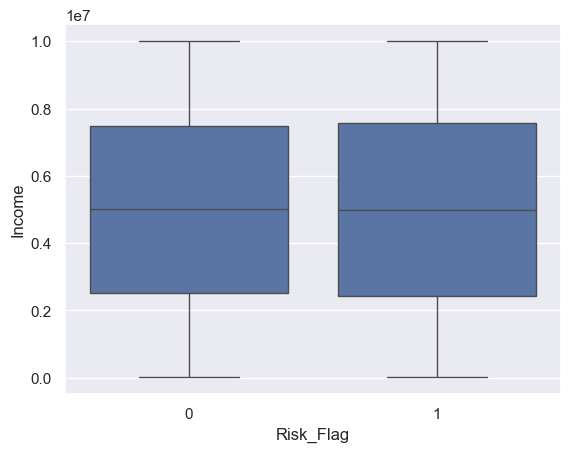

In [18]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='Age'>

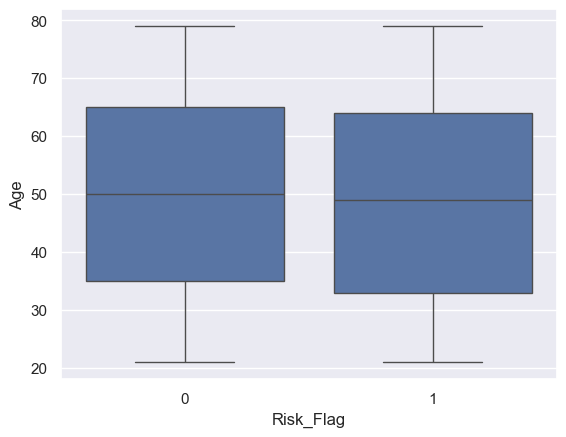

In [19]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='Experience'>

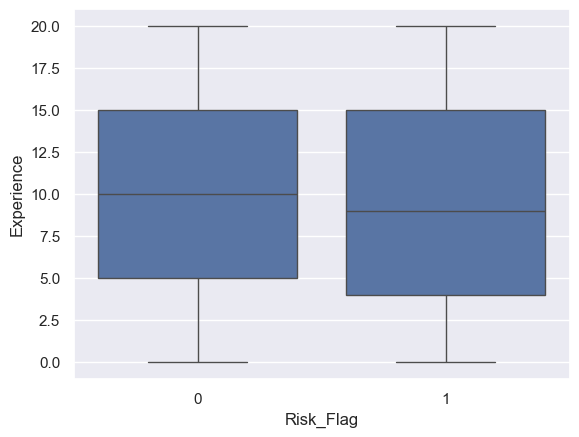

In [20]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

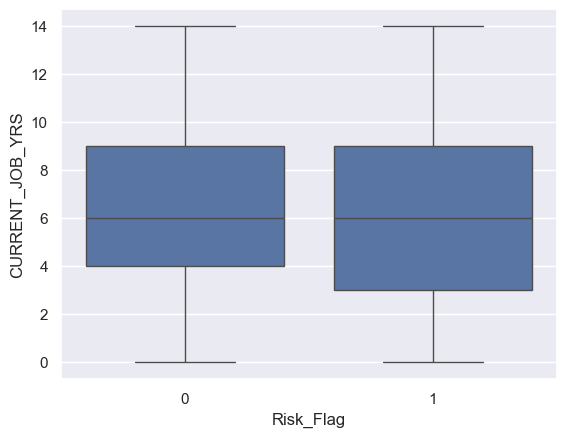

In [21]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

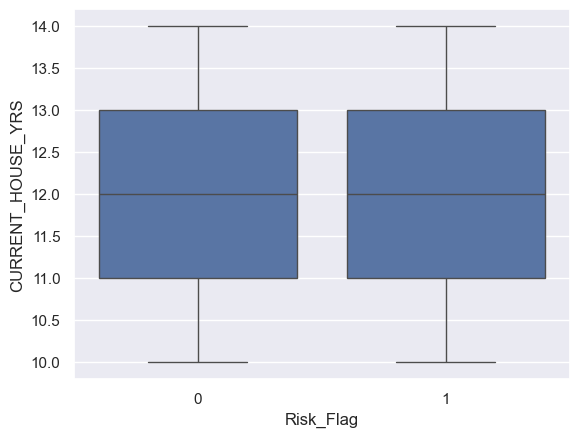

In [22]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

<Axes: xlabel='House_Ownership', ylabel='count'>

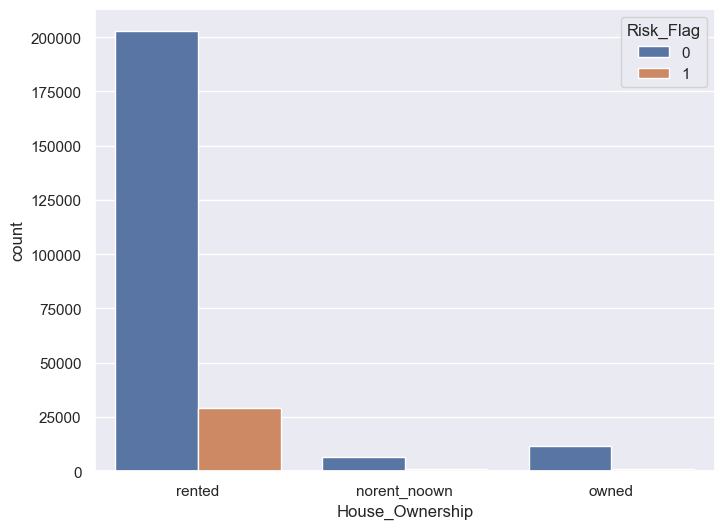

In [23]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='House_Ownership', hue='Risk_Flag', ax=ax, data=data)

<Axes: xlabel='Car_Ownership', ylabel='count'>

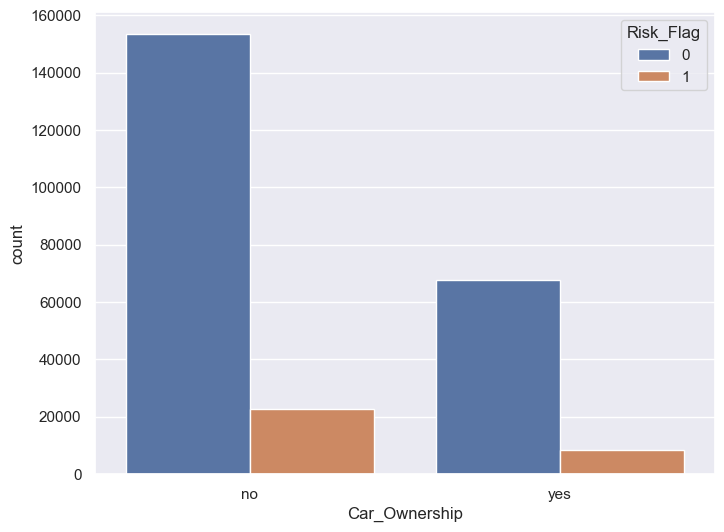

In [24]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)

<Axes: xlabel='Married/Single', ylabel='count'>

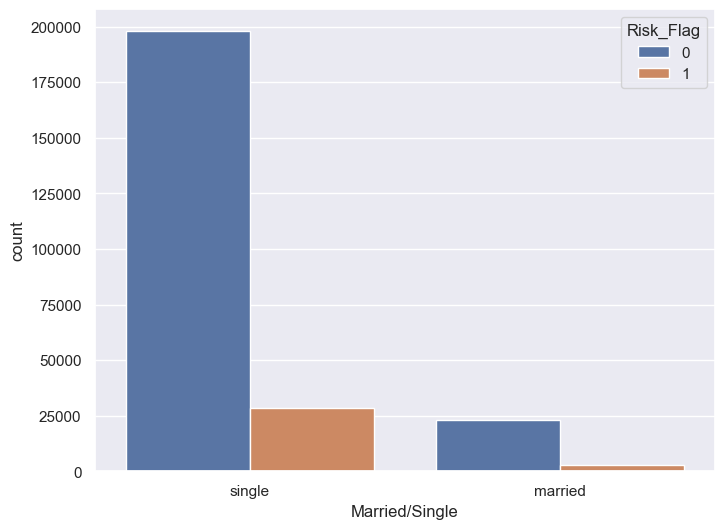

In [25]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

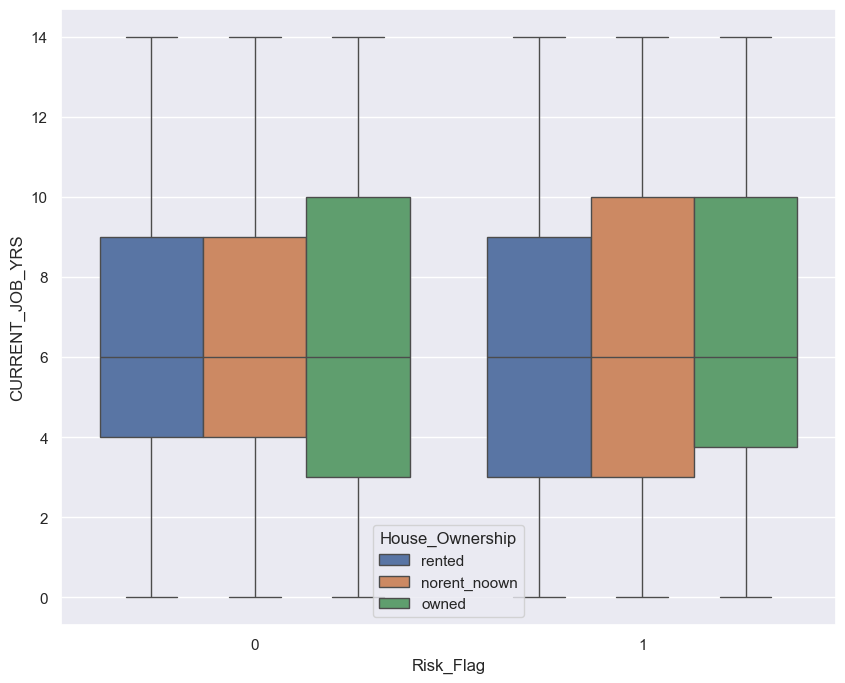

In [26]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)

```markdown
# Split Data into Train and Test
```

In [27]:
from sklearn.model_selection import train_test_split

x = data.drop(["Risk_Flag","Id"], axis=1)
y = data["Risk_Flag"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

# Feature Engineering

Se procesara a las variables categoricas de la siguiente manera:

marital_status, car_ownership – binarise

house_ownership – one-hot

profession, city, state – target encoding

Se escalara a las variables numericas

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [29]:
label_encoder = LabelEncoder()


for col in ['Married/Single', 'Car_Ownership']:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.transform(x_test[col])

In [30]:
onehot_encoder = OneHotEncoder(sparse_output=False)

house_ownership_encoded_train = onehot_encoder.fit_transform(x_train['House_Ownership'].values.reshape(-1, 1))
house_ownership_encoded_test = onehot_encoder.transform(x_test['House_Ownership'].values.reshape(-1, 1))

house_ownership_encoded_train_df = pd.DataFrame(house_ownership_encoded_train, columns=onehot_encoder.get_feature_names_out(['House_Ownership']))
house_ownership_encoded_test_df = pd.DataFrame(house_ownership_encoded_test, columns=onehot_encoder.get_feature_names_out(['House_Ownership']))

x_train = x_train.drop('House_Ownership', axis=1).reset_index(drop=True)
x_test = x_test.drop('House_Ownership', axis=1).reset_index(drop=True)

x_train = pd.concat([x_train, house_ownership_encoded_train_df], axis=1)
x_test = pd.concat([x_test, house_ownership_encoded_test_df], axis=1)


In [31]:
#Reset indexes
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [32]:
high_card_features = ['Profession', 'CITY', 'STATE']

from category_encoders import CatBoostEncoder

CBE_encoder = CatBoostEncoder()

for col in high_card_features:
    x_train[col] = CBE_encoder.fit_transform(x_train[col], y_train)
    x_test[col] = CBE_encoder.transform(x_test[col])

In [33]:
num_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
scaler = StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [35]:
smote_sampler = SMOTE(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[['smote', smote_sampler],
                            ['classifier', rf_clf]])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, brier_score_loss

print("-------------------------TEST SCORES RF_CLF-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES RF_CLF-----------------------
Recall: 61.3486
Precision: 56.0501
F1-Score: 58.5798
Accuracy score: 89.3294
AUC Score: 77.3011


In [37]:
y_pred = pipeline.predict_proba(x_test)[:,1]

In [38]:
print("-------------------------TEST SCORES RF_CLF-----------------------") 
print(f"Brier Score Loss: { round(brier_score_loss(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES RF_CLF-----------------------
Brier Score Loss: 8.0648
AUC Score: 92.6823


# Neural network

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import metrics

In [40]:
def create_model(learning_rate, METRICS):
    model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation = "sigmoid")])
    
    model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=METRICS,
    )
    return model

def train_model(model,x_train, x_test, y_train, y_test, epochs):
    history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=1024,
    epochs=epochs,
    callbacks=[early_stopping,ReduceLROnPlateau])
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    return epochs, hist



In [41]:
early_stopping = callbacks.EarlyStopping(
    monitor = "AUC",
    mode = "max",
    patience = 8,
    min_delta=0.001,
    restore_best_weights=True,
)
ReduceLROnPlateau = callbacks.ReduceLROnPlateau(
    monitor="AUC",
    patience = 8)

In [42]:
input_shape = [x_train.shape[1]]
learning_rate = 0.006
epochs = 100
classification_threshold = 0.1566
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
      keras.metrics.AUC()
    ]

    
model = create_model(learning_rate, METRICS)
epochs, hist = train_model(model,x_train, x_test, y_train, y_test, epochs)



c:\Users\Windows\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5277 - auc: 0.5434 - loss: 0.4719 - precision: 0.1385 - recall: 0.5347 - val_accuracy: 0.6533 - val_auc: 0.5929 - val_loss: 0.3707 - val_precision: 0.1666 - val_recall: 0.4546 - learning_rate: 0.0060
Epoch 2/100
 20/197 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7167 - auc: 0.6049 - loss: 0.3669 - precision: 0.1835 - recall: 0.3820

c:\Users\Windows\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `AUC` which is not available. Available metrics are: accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)
c:\Users\Windows\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `AUC` which is not available. Available metrics are: accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall,learning_rate.
  callback.on_epoch_end(epoch, logs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7153 - auc: 0.6048 - loss: 0.3687 - precision: 0.1812 - recall: 0.3712 - val_accuracy: 0.8122 - val_auc: 0.6203 - val_loss: 0.3640 - val_precision: 0.2101 - val_recall: 0.1908 - learning_rate: 0.0060
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7254 - auc: 0.6145 - loss: 0.3634 - precision: 0.1861 - recall: 0.3692 - val_accuracy: 0.8274 - val_auc: 0.6399 - val_loss: 0.3627 - val_precision: 0.2349 - val_recall: 0.1787 - learning_rate: 0.0060
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7300 - auc: 0.6192 - loss: 0.3655 - precision: 0.1948 - recall: 0.3754 - val_accuracy: 0.7468 - val_auc: 0.6461 - val_loss: 0.3583 - val_precision: 0.2093 - val_recall: 0.3809 - learning_rate: 0.0060
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7331 - auc: 0.6242 - loss: 0.3601 - precision: 0.1927 - recall: 0.3737 - val_accuracy: 0.7482 - val_auc: 0.6513 - val_loss: 0.3580 - val_precisi

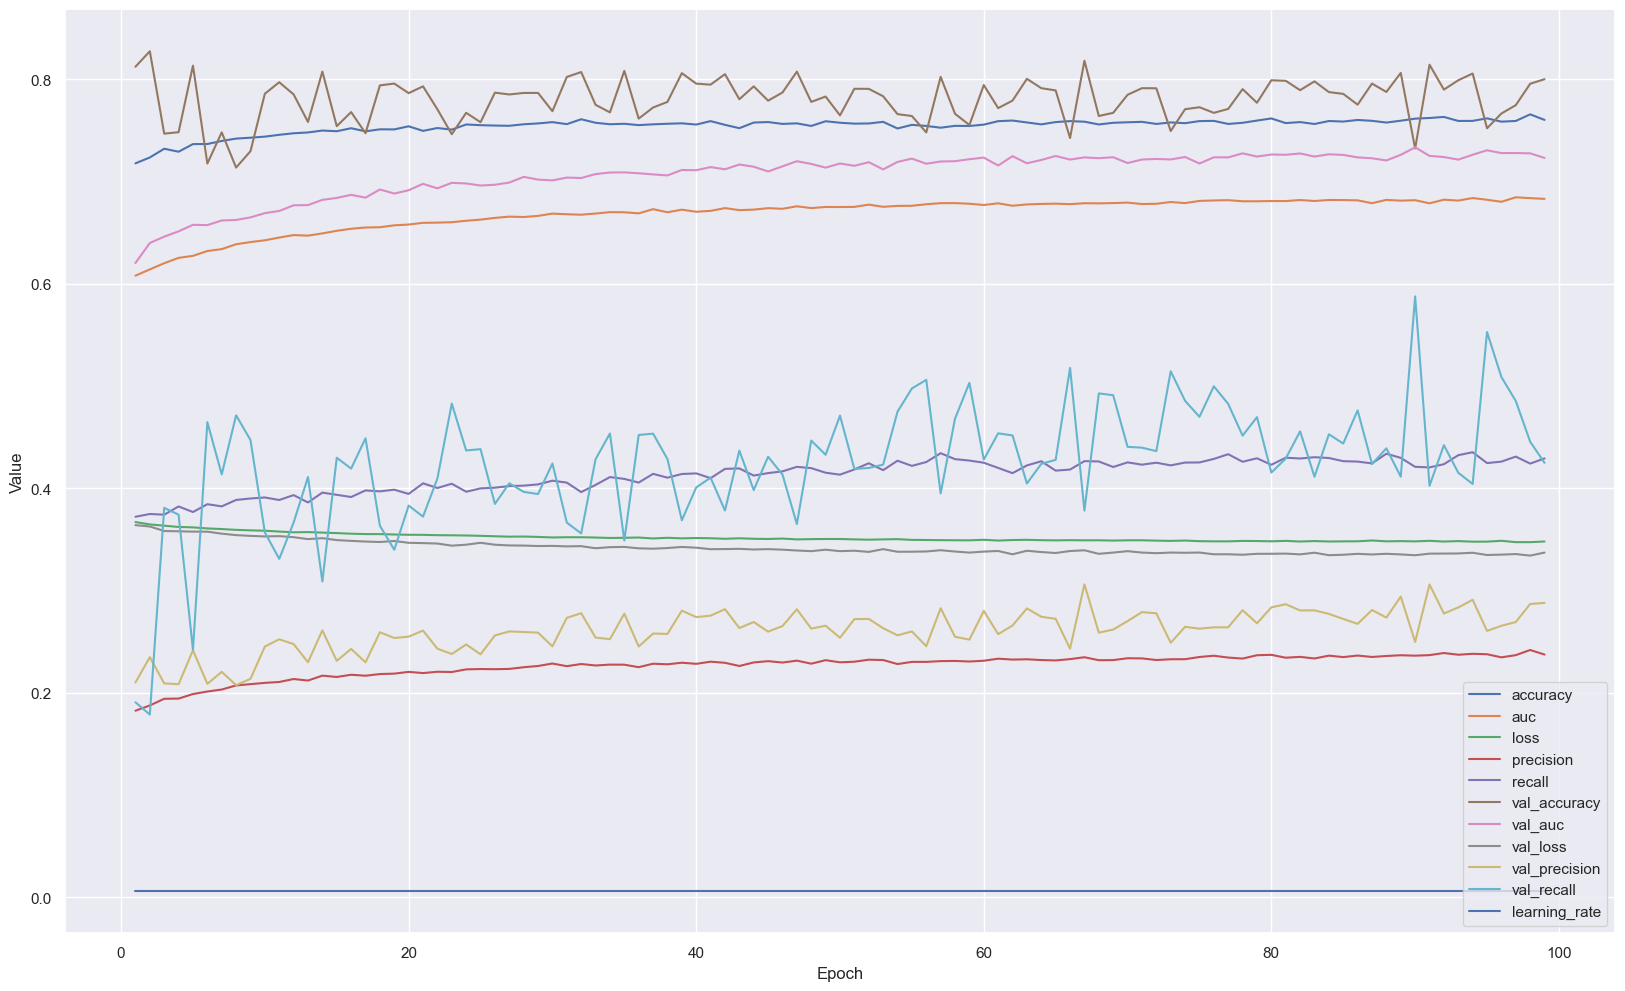

In [43]:
def plot_curve(epochs, hist):

  plt.figure(figsize=(20,12))
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in hist:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()


plot_curve(epochs, hist)

loss: 0.3331 - auc: 0.7323 - precision: 0.5627 - recall: 0.0582 - binary_accuracy: 0.8786 - val_loss: 0.3291 - val_auc: 0.7621 - val_precision: 0.6596 - val_recall: 0.0200 - val_binary_accuracy: 0.8782

In [44]:
y_pred = model.predict(x_test)

1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step


In [45]:
print("-------------------------TEST SCORES NN-----------------------") 
print(f"Brier Score Loss: { round(brier_score_loss(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES NN-----------------------
Brier Score Loss: 9.8609
AUC Score: 72.3274


In [46]:
#y_pred = model.predict(x_test)
# Array para encontras threshold optimo
#thresholds = np.arange(0.0, 1.0, 0.0001)
#fscore = np.zeros(shape=(len(thresholds)))
#print('Length of sequence: {}'.format(len(thresholds)))


#for index, elem in enumerate(thresholds):

   #y_pred_prob = (y_pred > elem).astype('int')

    #fscore[index] = f1_score(y_test, y_pred_prob)


#index = np.argmax(fscore)
#thresholdOpt = round(thresholds[index], ndigits = 4)
#fscoreOpt = round(fscore[index], ndigits = 4)
#print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))

# XGBoost

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [5,10],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

##model = xgb.XGBClassifier(objective="binary:logistic", verbosity=0)

#grid_cv = GridSearchCV(model, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

#grid_cv.fit(x_train, y_train)



In [48]:
#grid_cv.best_score_


In [49]:
#best_params = grid_cv.best_params_
#best_params
eval_set = [(x_train, y_train), (x_test, y_test)]

In [71]:
#Ajustamos por clase desbalanceada
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

In [72]:
final_xgbcl = xgb.XGBClassifier(
    booster="gbtree",
    gamma=1,
    learning_rate=0.6,
    max_depth=14,
    reg_lambda=7,
    reg_alpha=1,
    subsample=0.5,
    objective="binary:logistic",
    colsample_bytree=0.7,
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    early_stopping_rounds=10,
    eval_metric=["auc", "logloss"],
)

final_xgbcl.fit(
    x_train, y_train, 
    eval_set=eval_set, 
    verbose=True
)



[0]	validation_0-auc:0.76255	validation_0-logloss:0.59682	validation_1-auc:0.71567	validation_1-logloss:0.60262
[1]	validation_0-auc:0.81410	validation_0-logloss:0.54303	validation_1-auc:0.75452	validation_1-logloss:0.55703
[2]	validation_0-auc:0.87045	validation_0-logloss:0.47460	validation_1-auc:0.81302	validation_1-logloss:0.49155
[3]	validation_0-auc:0.88904	validation_0-logloss:0.44313	validation_1-auc:0.82823	validation_1-logloss:0.46667
[4]	validation_0-auc:0.91102	validation_0-logloss:0.40376	validation_1-auc:0.84671	validation_1-logloss:0.43300
[5]	validation_0-auc:0.92273	validation_0-logloss:0.37746	validation_1-auc:0.85775	validation_1-logloss:0.41163
[6]	validation_0-auc:0.93153	validation_0-logloss:0.35769	validation_1-auc:0.86642	validation_1-logloss:0.39408
[7]	validation_0-auc:0.93821	validation_0-logloss:0.33932	validation_1-auc:0.87368	validation_1-logloss:0.37951
[8]	validation_0-auc:0.94175	validation_0-logloss:0.33045	validation_1-auc:0.87449	validation_1-logloss:

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['auc', 'logloss'],
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [73]:
results = final_xgbcl.evals_result()
epochs = len(results["validation_0"]["auc"])
x_axis = range(0, epochs)

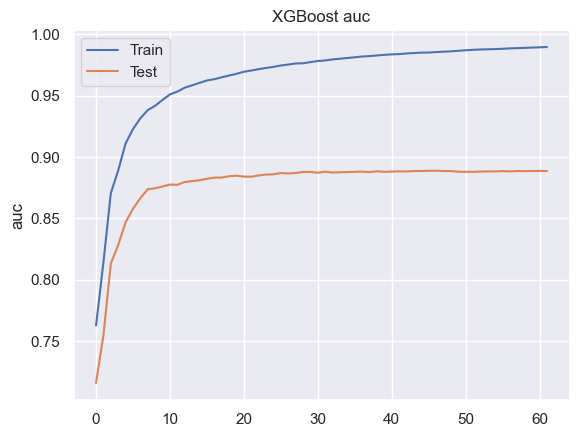

In [74]:
from matplotlib import pyplot

fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']["auc"], label='Train')
ax.plot(x_axis, results['validation_1']["auc"], label='Test')
ax.legend()
pyplot.ylabel("auc")
pyplot.title('XGBoost auc')
pyplot.show()

In [75]:
y_pred = final_xgbcl.predict(x_test)


In [76]:
print("-------------------------TEST SCORES XGBOOST-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES XGBOOST-----------------------
Recall: 69.4789
Precision: 52.1555
F1-Score: 59.5836
Accuracy score: 88.4067
AUC Score: 80.2701


In [69]:
y_pred = final_xgbcl.predict_proba(x_test)[:,1]

In [70]:
print("-------------------------TEST SCORES XGBOOST-----------------------") 
print(f"Brier Score Loss: { round(brier_score_loss(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES XGBOOST-----------------------
Brier Score Loss: 8.9877
AUC Score: 88.7858


# Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
logreg.fit(x_train, y_train)
y_pred = logreg.predict_proba(x_test)[:,1]

In [60]:
print("-------------------------TEST SCORES LOGREG-----------------------") 
print(f"Brier Score Loss: { round(brier_score_loss(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES LOGREG-----------------------
Brier Score Loss: 10.5882
AUC Score: 61.374


# El modelo que mejor responde es el XGBOOST